## Imports

In [1]:
import numpy as np
from kwave.kgrid import kWaveGrid
from kwave.kmedium import kWaveMedium
from kwave.ksource import kSource
from kwave.ksensor import kSensor
from kwave.options.simulation_options import SimulationOptions
from kwave.options.simulation_execution_options import SimulationExecutionOptions
from kwave.kspaceFirstOrder3D import kspaceFirstOrder3D
from kwave.kspaceFirstOrder2D import kspaceFirstOrder2D
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.integrate import trapezoid
from scipy.signal import find_peaks
from scipy.signal import correlate
from scipy.signal import fftconvolve

from setup_simulation import setup_simulation, visualize_source, run_simulation
from sensors import create_sensor_3D, plot_sensor_sensitivity
from post_processing import process_sensor_data, find_sensitivity_extremes, plot_raw_pressure, analyze_sensor_performance
from match_filter import add_gaussian_noise, plot_presure_and_noise_presure_over_time, apply_match_filter, plot_match_filter_results


# Point sensor

t end: 2.5012473272817233e-06


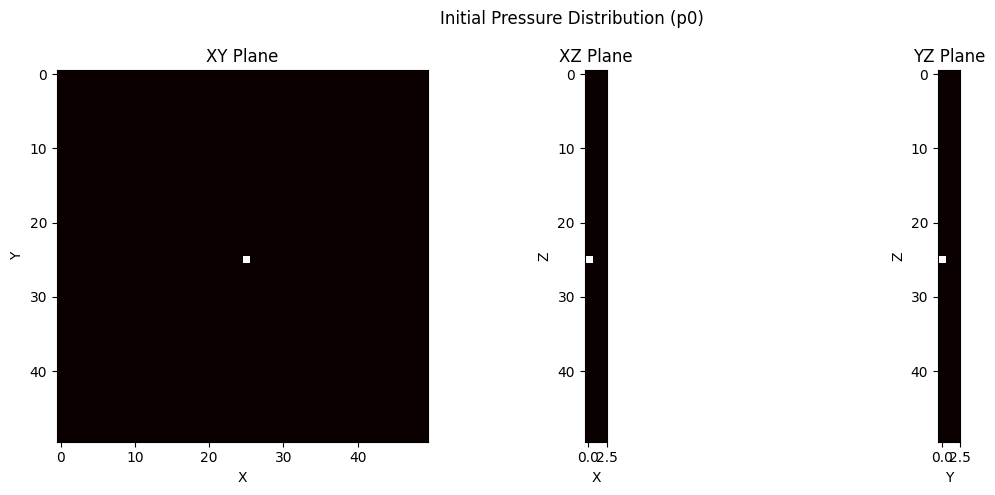

In [2]:
# Set up simulation
sim_params = setup_simulation(simulation_type='3D')

visualize_source(sim_params)

Point sensor created!


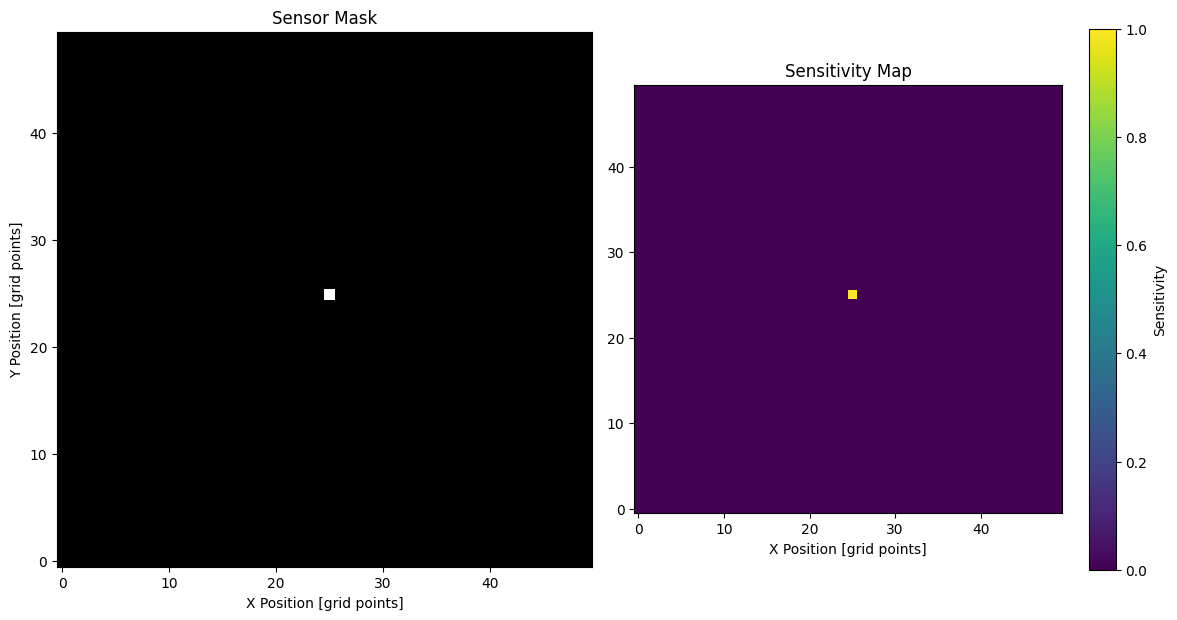

In [3]:
"""
Factory: create a 3D sensor by type:
    1: point
    2: linear delta
    3: linear Gaussian
    4: linear uniform
    5: rectangular gaussian
    6: ectangular uniform
    7: snake-shaped linear
    8: rectangular + checkerboard
"""

# Create sensor with Gaussian sensitivity
sensor = create_sensor_3D(
    sensor_type=1, 
    sim_params=sim_params
)

plot_sensor_sensitivity(sensor, sim_params)

In [4]:
# Run simulation and apply sensitivity
sensor_data = run_simulation(sim_params, sensor)
sensor_data['p'] = sensor_data['p'].reshape(-1,1)

┌───────────────────────────────────────────────────────────────┐
│                   kspaceFirstOrder-OMP v1.3                   │
├───────────────────────────────────────────────────────────────┤
│ Reading simulation configuration:                        Done │
│ Number of CPU threads:                                    128 │
│ Processor name:      Intel(R) Xeon(R) Gold 6338 CPU @ 2.00GHz │
├───────────────────────────────────────────────────────────────┤
│                      Simulation details                       │
├───────────────────────────────────────────────────────────────┤
│ Domain dimensions:                               70 x 70 x 23 │
│ Medium type:                                               3D │
│ Simulation time steps:                                    291 │
├───────────────────────────────────────────────────────────────┤
│                        Initialization                         │
├───────────────────────────────────────────────────────────────┤
│ Memory a

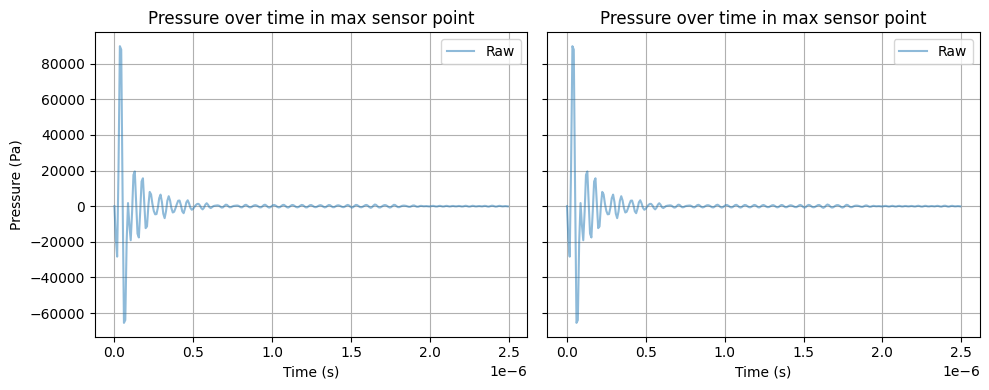

In [5]:
# Extraction sensor recording and applying the sensitivity of the sensor
sensor_mask_original_size = np.squeeze(sensor.mask[sim_params['pml_size']:-sim_params['pml_size'], sim_params['pml_size']:-sim_params['pml_size'], sim_params['sensor_plane']])
mask_flat, weighted_p, info_dict = process_sensor_data(sensor_mask_original_size, sensor.sensitivity_map, sensor_data['p'])

max_pos, min_non_zero_pos, sensor_idx_max, sensor_idx_min = find_sensitivity_extremes(info_dict, sensor.sensitivity_map)


plot_raw_pressure(
    raw_data      = sensor_data,
    weighted_data = weighted_p,
    kgrid         = sim_params['kgrid'],
    sensor_indices= [sensor_idx_max, sensor_idx_min]
)

In [6]:
results = analyze_sensor_performance(
    p_data=sensor_data['p'],
    t_array=sim_params['kgrid'].t_array[0],
    sensor_mask=sensor_mask_original_size,
    sensitivity_map=sensor.sensitivity_map if hasattr(sensor, 'sensitivity_map') else None
)

# Print aggregate results
print("\nAggregate Sensor Performance:")
for k, v in results['aggregate_metrics'].items():
    print(f"{k:>20}: {v:.4e}")

# Access individual point metrics
print("\nFirst sensor point details:")
for k, v in results['point_metrics'][0].items():
    print(f"{k:>20}: {v:.4e}")


Aggregate Sensor Performance:
  mean_peak_pressure: 8.9833e+04
   std_peak_pressure: 0.0000e+00
   max_peak_pressure: 8.9833e+04
        total_energy: 2.5058e+02
   energy_uniformity: 0.0000e+00
   mean_time_to_peak: 3.4400e-08

First sensor point details:
       peak_pressure: 8.9833e+04
        time_to_peak: 3.4400e-08
        peak_to_peak: 1.5534e+05
              energy: 2.5058e+02
     weighted_energy: 2.5058e+02
     signal_duration: 2.5800e-08
  dominant_frequency: 2.1178e+07
        rms_pressure: 1.0006e+04


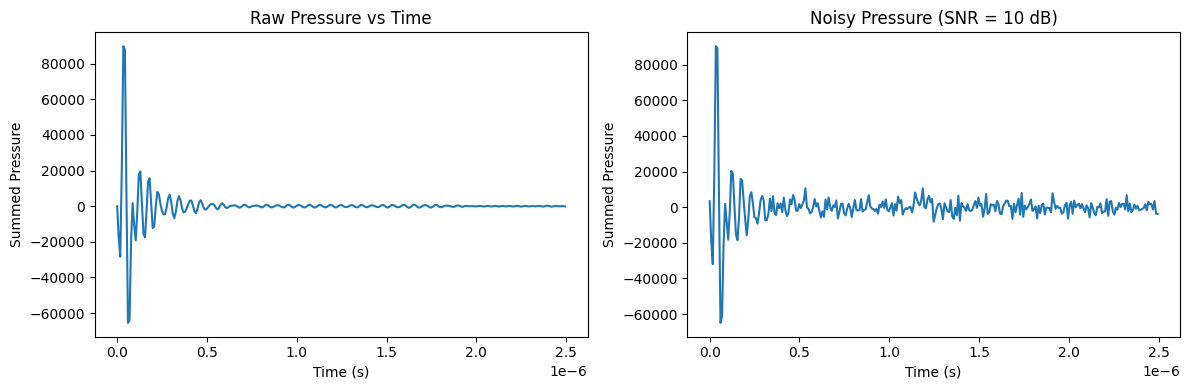

In [7]:
plot_presure_and_noise_presure_over_time(weighted_p, sim_params['kgrid'], snr_db=10)

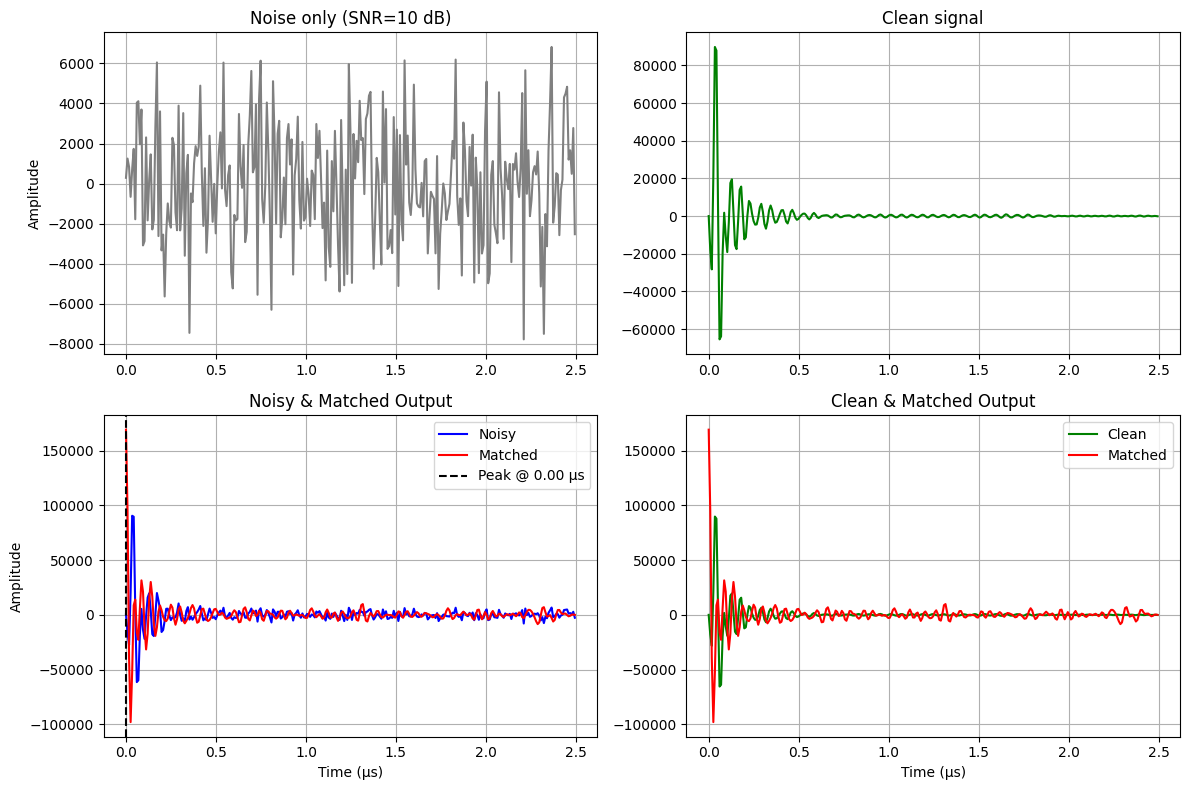

In [8]:
match_filter_results = apply_match_filter(weighted_p, sim_params['kgrid'], snr_db=10)
plot_match_filter_results(match_filter_results, sim_params['kgrid'].t_array.flatten(), snr_db=10)

# Linear sensor with Gaussian sensitivity distribution

t end: 2.5012473272817233e-06
Linear gaussian sensor created!


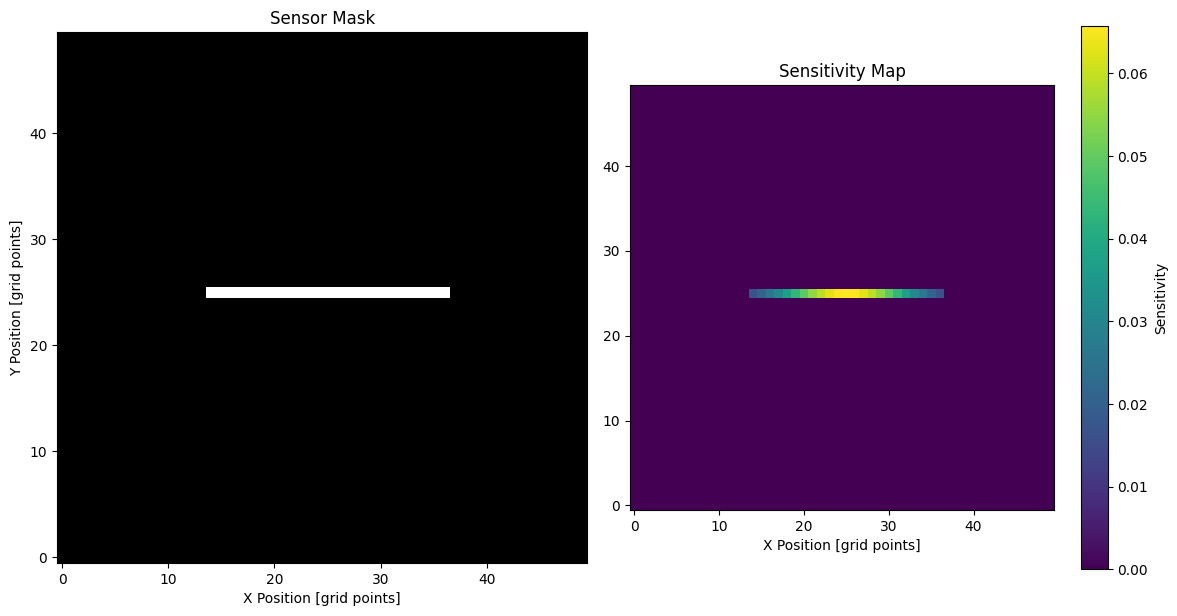

In [9]:
# Set up simulation
sim_params = setup_simulation(simulation_type='3D')

"""
Factory: create a 3D sensor by type:
    1: point
    2: linear delta
    3: linear Gaussian
    4: linear uniform
    5: rectangular gaussian
    6: ectangular uniform
    7: snake-shaped linear
    8: rectangular + checkerboard
"""

# Create sensor with Gaussian sensitivity
sensor = create_sensor_3D(
    sensor_type=3, 
    sim_params=sim_params,
    length=1e-3,
    width=1e-3,
    sigma=0.3e-3,
    distribution='gaussian'
)

plot_sensor_sensitivity(sensor, sim_params)

In [10]:
# Run simulation and apply sensitivity
sensor_data = run_simulation(sim_params, sensor)

┌───────────────────────────────────────────────────────────────┐
│                   kspaceFirstOrder-OMP v1.3                   │
├───────────────────────────────────────────────────────────────┤
│ Reading simulation configuration:                        Done │
│ Number of CPU threads:                                    128 │
│ Processor name:      Intel(R) Xeon(R) Gold 6338 CPU @ 2.00GHz │
├───────────────────────────────────────────────────────────────┤
│                      Simulation details                       │
├───────────────────────────────────────────────────────────────┤
│ Domain dimensions:                               70 x 70 x 23 │
│ Medium type:                                               3D │
│ Simulation time steps:                                    291 │
├───────────────────────────────────────────────────────────────┤
│                        Initialization                         │
├───────────────────────────────────────────────────────────────┤
│ Memory a

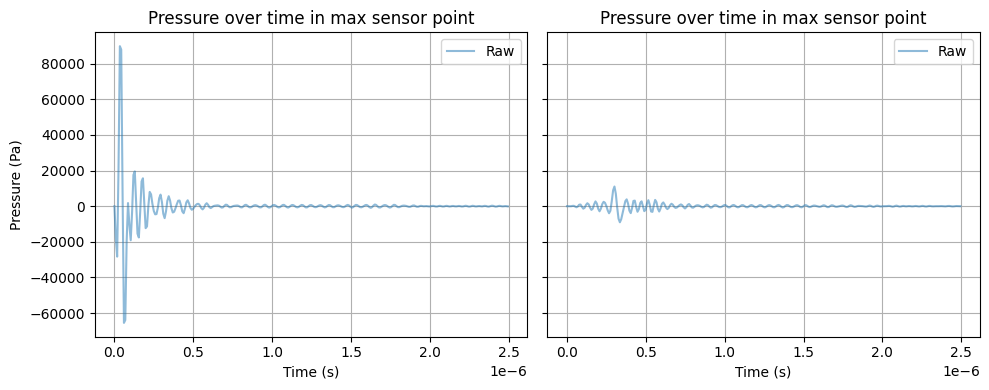

In [11]:
# Extraction sensor recording and applying the sensitivity of the sensor
sensor_mask_original_size = np.squeeze(sensor.mask[sim_params['pml_size']:-sim_params['pml_size'], sim_params['pml_size']:-sim_params['pml_size'], sim_params['sensor_plane']])
mask_flat, weighted_p, info_dict = process_sensor_data(sensor_mask_original_size, sensor.sensitivity_map, sensor_data['p'])

max_pos, min_non_zero_pos, sensor_idx_max, sensor_idx_min = find_sensitivity_extremes(info_dict, sensor.sensitivity_map)

plot_raw_pressure(
    raw_data      = sensor_data,
    weighted_data = weighted_p,
    kgrid         = sim_params['kgrid'],
    sensor_indices= [sensor_idx_max, sensor_idx_min]
)

In [12]:
results = analyze_sensor_performance(
    p_data=sensor_data['p'],
    t_array=sim_params['kgrid'].t_array[0],
    sensor_mask=sensor_mask_original_size,
    sensitivity_map=sensor.sensitivity_map if hasattr(sensor, 'sensitivity_map') else None
)

# Print aggregate results
print("\nAggregate Sensor Performance:")
for k, v in results['aggregate_metrics'].items():
    print(f"{k:>20}: {v:.4e}")

# Access individual point metrics
print("\nFirst sensor point details:")
for k, v in results['point_metrics'][0].items():
    print(f"{k:>20}: {v:.4e}")


Aggregate Sensor Performance:
  mean_peak_pressure: 3.1902e+04
   std_peak_pressure: 2.2738e+04
   max_peak_pressure: 8.9833e+04
        total_energy: 1.2867e+03
   energy_uniformity: 1.1631e+00
   mean_time_to_peak: 1.7723e-07

First sensor point details:
       peak_pressure: 1.1038e+04
        time_to_peak: 3.0100e-07
        peak_to_peak: 2.0071e+04
              energy: 6.4026e+00
     weighted_energy: 1.7227e-03
     signal_duration: 3.4400e-08
  dominant_frequency: 1.7182e+07
        rms_pressure: 1.5995e+03


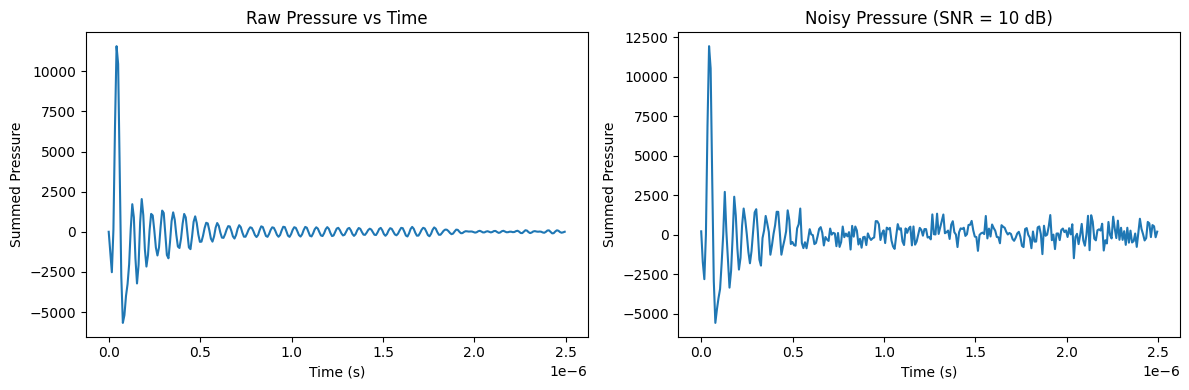

In [13]:
plot_presure_and_noise_presure_over_time(weighted_p, sim_params['kgrid'], snr_db=10)

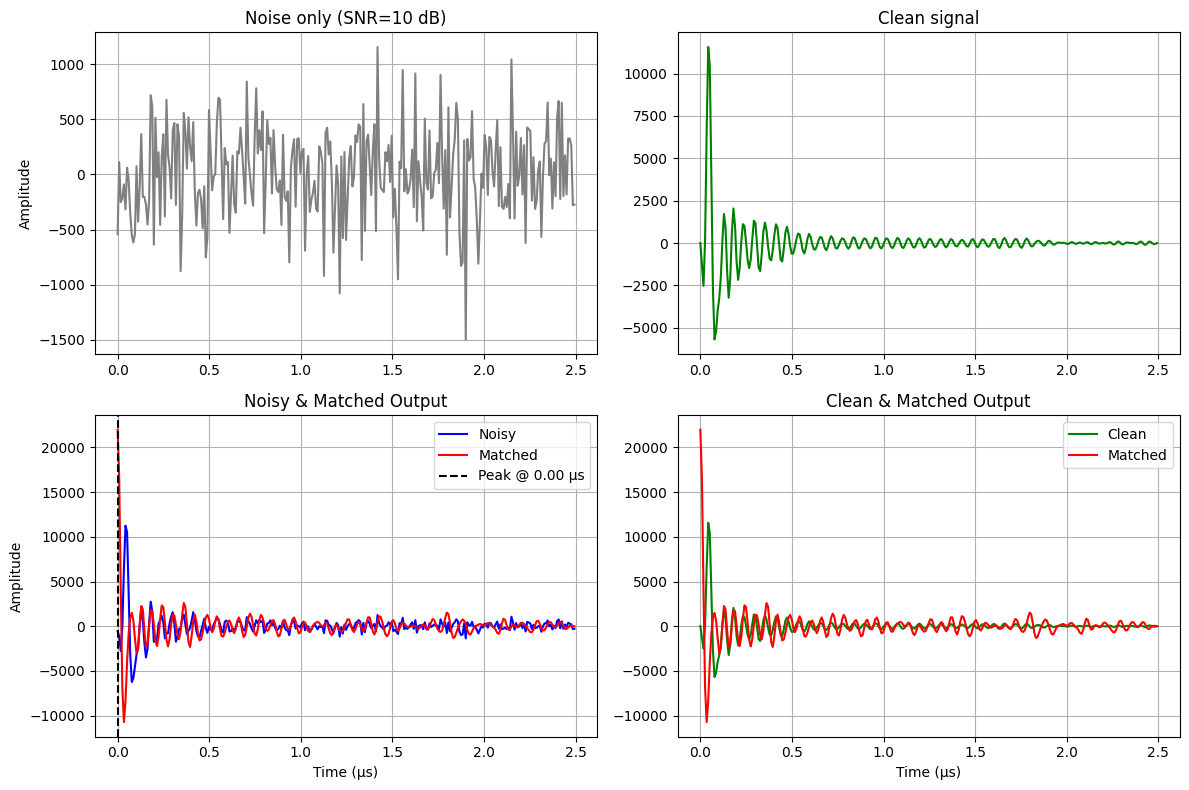

In [14]:
match_filter_results = apply_match_filter(weighted_p, sim_params['kgrid'], snr_db=10)
plot_match_filter_results(match_filter_results, sim_params['kgrid'].t_array.flatten(), snr_db=10)

# Snake-shaped Linear sensor with Uniform sensitivity distribution

t end: 2.5012473272817233e-06
Rectangular uniform sensor created!


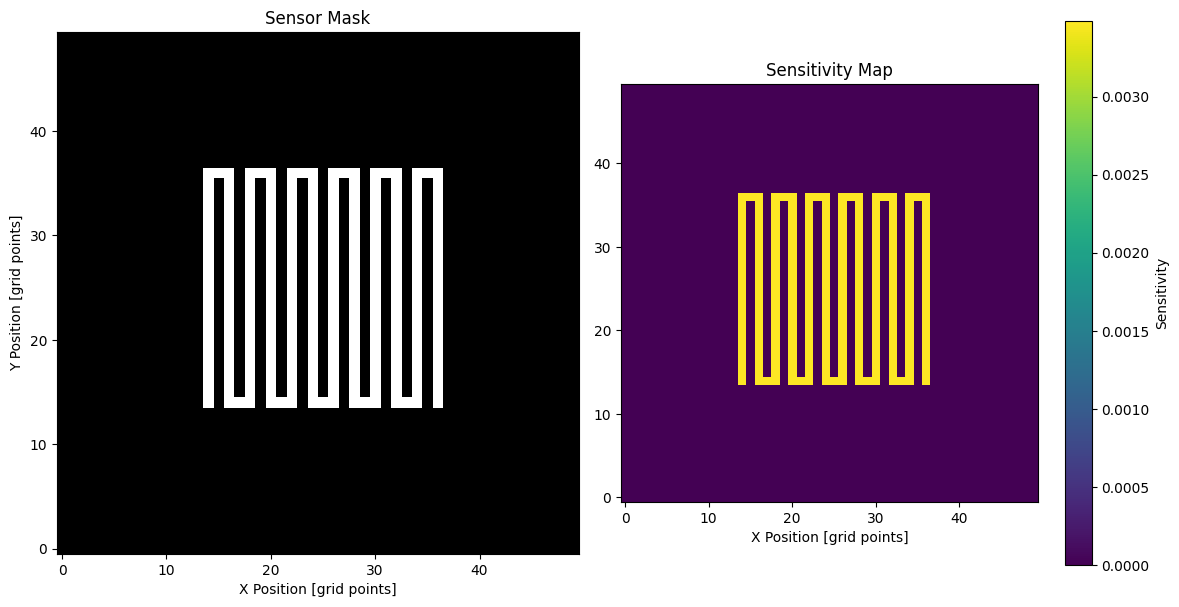

In [15]:
# Set up simulation
sim_params = setup_simulation(simulation_type='3D')

"""
Factory: create a 3D sensor by type:
    1: point
    2: linear delta
    3: linear Gaussian
    4: linear uniform
    5: rectangular gaussian
    6: ectangular uniform
    7: snake-shaped linear
    8: rectangular + checkerboard
"""

# Create sensor with Gaussian sensitivity
sensor = create_sensor_3D(
    sensor_type=7, 
    sim_params=sim_params,
    length=1e-3,
    width=1e-3,
    sigma=0.3e-3,
    distribution='uniform'
)

plot_sensor_sensitivity(sensor, sim_params)

In [16]:
# Run simulation and apply sensitivity
sensor_data = run_simulation(sim_params, sensor)

┌───────────────────────────────────────────────────────────────┐
│                   kspaceFirstOrder-OMP v1.3                   │
├───────────────────────────────────────────────────────────────┤
│ Reading simulation configuration:                        Done │
│ Number of CPU threads:                                    128 │
│ Processor name:      Intel(R) Xeon(R) Gold 6338 CPU @ 2.00GHz │
├───────────────────────────────────────────────────────────────┤
│                      Simulation details                       │
├───────────────────────────────────────────────────────────────┤
│ Domain dimensions:                               70 x 70 x 23 │
│ Medium type:                                               3D │
│ Simulation time steps:                                    291 │
├───────────────────────────────────────────────────────────────┤
│                        Initialization                         │
├───────────────────────────────────────────────────────────────┤
│ Memory a

(24, 25) (14, 14)


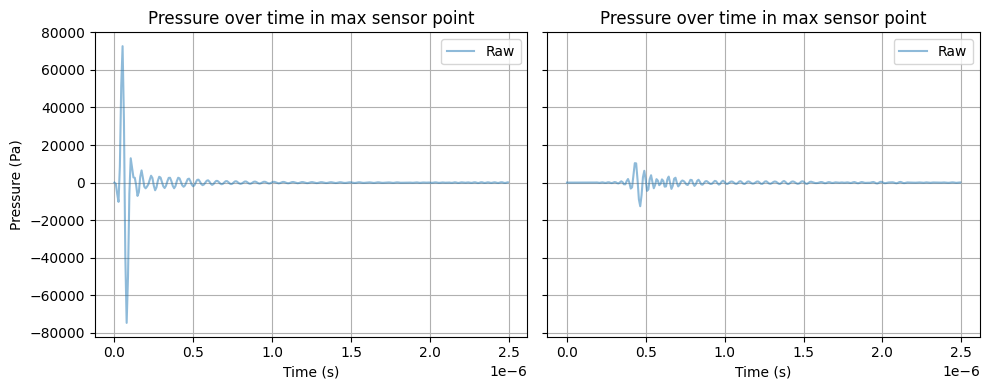

In [17]:
# Extraction sensor recording and applying the sensitivity of the sensor
sensor_mask_original_size = np.squeeze(sensor.mask[sim_params['pml_size']:-sim_params['pml_size'], sim_params['pml_size']:-sim_params['pml_size'], sim_params['sensor_plane']])
mask_flat, weighted_p, info_dict = process_sensor_data(sensor_mask_original_size, sensor.sensitivity_map, sensor_data['p'])

max_pos, min_non_zero_pos, sensor_idx_max, sensor_idx_min = find_sensitivity_extremes(info_dict, sensor.sensitivity_map)
print(max_pos, min_non_zero_pos)


plot_raw_pressure(
    raw_data      = sensor_data,
    weighted_data = weighted_p,
    kgrid         = sim_params['kgrid'],
    sensor_indices= [sensor_idx_max, sensor_idx_min])

In [18]:
results = analyze_sensor_performance(
    p_data=sensor_data['p'],
    t_array=sim_params['kgrid'].t_array[0],
    sensor_mask=sensor_mask_original_size,
    sensitivity_map=sensor.sensitivity_map if hasattr(sensor, 'sensitivity_map') else None
)

# Print aggregate results
print("\nAggregate Sensor Performance:")
for k, v in results['aggregate_metrics'].items():
    print(f"{k:>20}: {v:.4e}")

# Access individual point metrics
print("\nFirst sensor point details:")
for k, v in results['point_metrics'][0].items():
    print(f"{k:>20}: {v:.4e}")


Aggregate Sensor Performance:
  mean_peak_pressure: 2.1857e+04
   std_peak_pressure: 1.6073e+04
   max_peak_pressure: 9.2767e+04
        total_energy: 7.1598e+03
   energy_uniformity: 1.5737e+00
   mean_time_to_peak: 2.6372e-07

First sensor point details:
       peak_pressure: 1.2569e+04
        time_to_peak: 4.6440e-07
        peak_to_peak: 2.2935e+04
              energy: 6.4536e+00
     weighted_energy: 7.8350e-05
     signal_duration: 6.0200e-08
  dominant_frequency: 1.9979e+07
        rms_pressure: 1.6059e+03


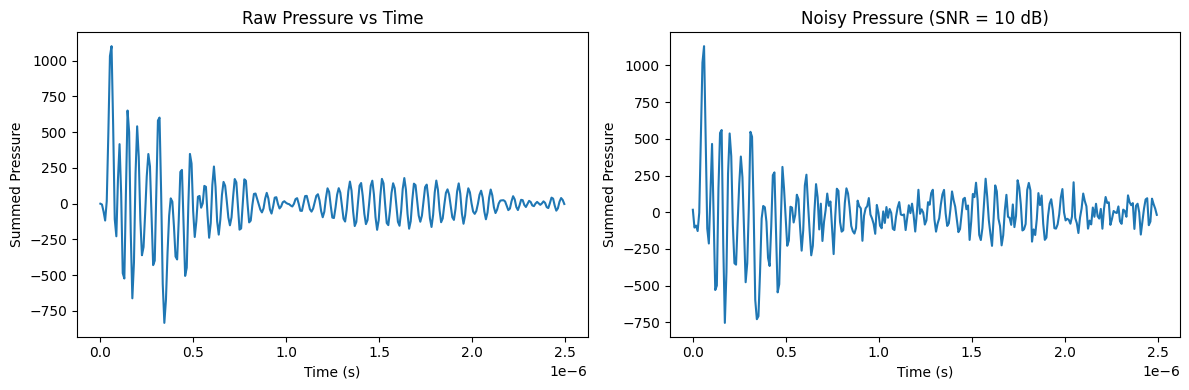

In [19]:
plot_presure_and_noise_presure_over_time(weighted_p, sim_params['kgrid'], snr_db=10)

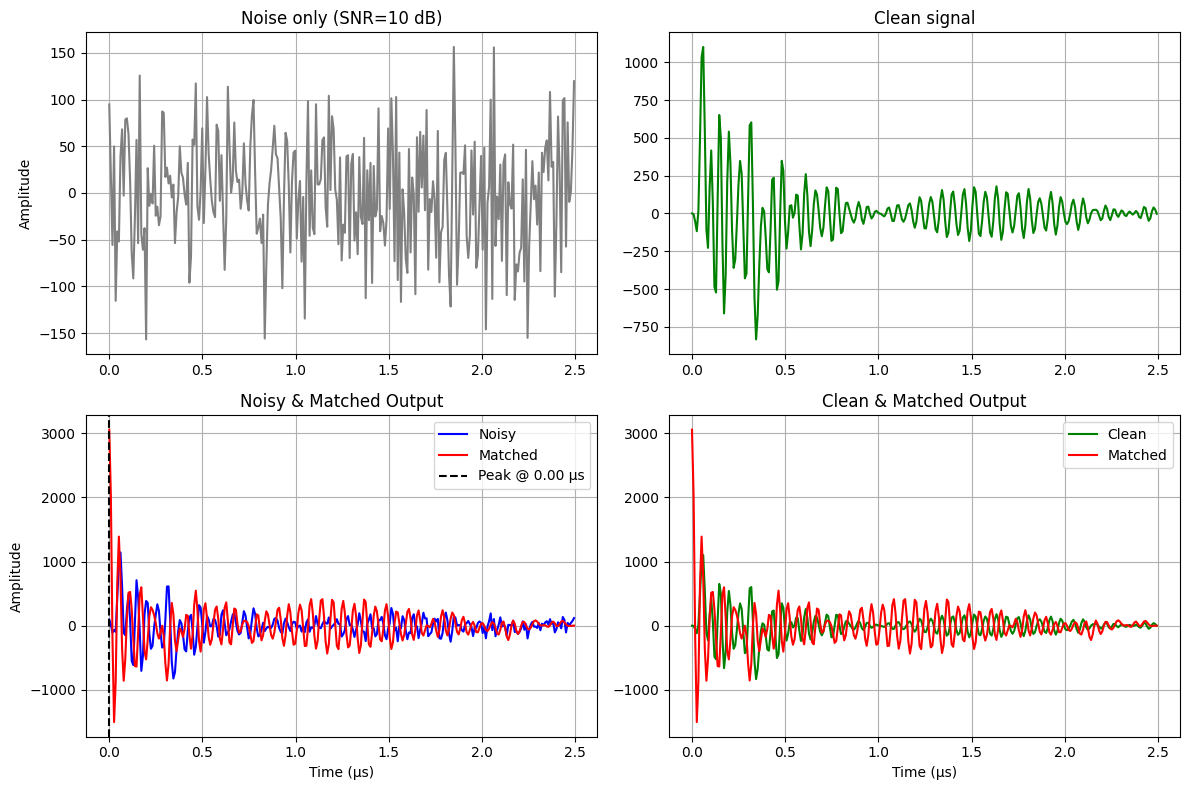

In [20]:
match_filter_results = apply_match_filter(weighted_p, sim_params['kgrid'], snr_db=10)
plot_match_filter_results(match_filter_results, sim_params['kgrid'].t_array.flatten(), snr_db=10)

# rectangular + checkerboard sensor with Gaussian sensitivity distribution

t end: 2.5012473272817233e-06
Rectangular gaussian sensor created!


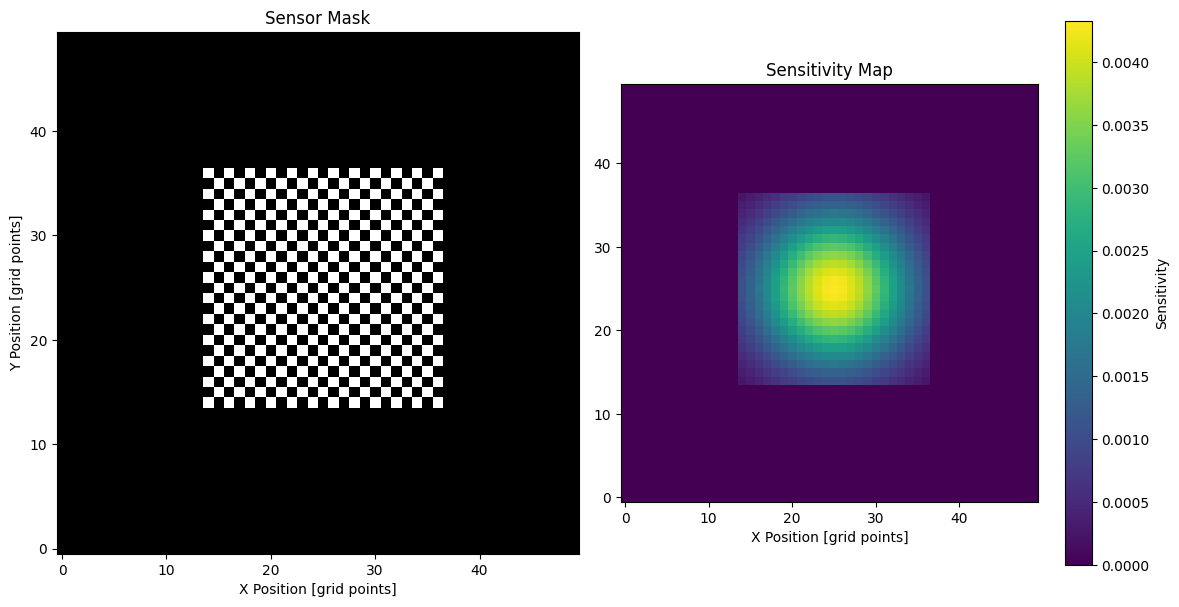

In [22]:
# Set up simulation
sim_params = setup_simulation(simulation_type='3D')

"""
Factory: create a 3D sensor by type:
    1: point
    2: linear delta
    3: linear Gaussian
    4: linear uniform
    5: rectangular gaussian
    6: ectangular uniform
    7: snake-shaped linear
    8: rectangular + checkerboard
"""

# Create sensor with Gaussian sensitivity
sensor = create_sensor_3D(
    sensor_type=8, 
    sim_params=sim_params,
    length=1e-3,
    width=1e-3,
    sigma=0.3e-3,
    distribution='gaussian'
)

plot_sensor_sensitivity(sensor, sim_params)

In [23]:
# Run simulation and apply sensitivity
sensor_data = run_simulation(sim_params, sensor)

┌───────────────────────────────────────────────────────────────┐
│                   kspaceFirstOrder-OMP v1.3                   │
├───────────────────────────────────────────────────────────────┤
│ Reading simulation configuration:                        Done │
│ Number of CPU threads:                                    128 │
│ Processor name:      Intel(R) Xeon(R) Gold 6338 CPU @ 2.00GHz │
├───────────────────────────────────────────────────────────────┤
│                      Simulation details                       │
├───────────────────────────────────────────────────────────────┤
│ Domain dimensions:                               70 x 70 x 23 │
│ Medium type:                                               3D │
│ Simulation time steps:                                    291 │
├───────────────────────────────────────────────────────────────┤
│                        Initialization                         │
├───────────────────────────────────────────────────────────────┤
│ Memory a

(25, 25) (14, 14)


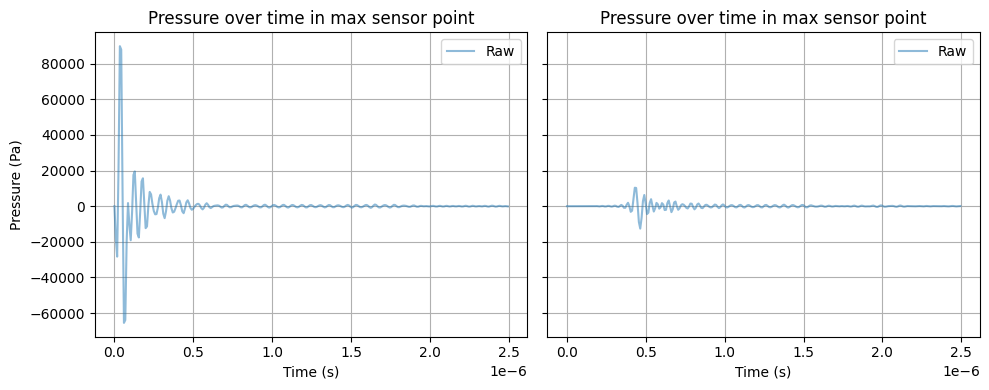

In [24]:
# Extraction sensor recording and applying the sensitivity of the sensor
sensor_mask_original_size = np.squeeze(sensor.mask[sim_params['pml_size']:-sim_params['pml_size'], sim_params['pml_size']:-sim_params['pml_size'], sim_params['sensor_plane']])
mask_flat, weighted_p, info_dict = process_sensor_data(sensor_mask_original_size, sensor.sensitivity_map, sensor_data['p'])

max_pos, min_non_zero_pos, sensor_idx_max, sensor_idx_min = find_sensitivity_extremes(info_dict, sensor.sensitivity_map)
print(max_pos, min_non_zero_pos)


plot_raw_pressure(
    raw_data      = sensor_data,
    weighted_data = weighted_p,
    kgrid         = sim_params['kgrid'],
    sensor_indices= [sensor_idx_max, sensor_idx_min])

In [25]:
results = analyze_sensor_performance(
    p_data=sensor_data['p'],
    t_array=sim_params['kgrid'].t_array[0],
    sensor_mask=sensor_mask_original_size,
    sensitivity_map=sensor.sensitivity_map if hasattr(sensor, 'sensitivity_map') else None
)

# Print aggregate results
print("\nAggregate Sensor Performance:")
for k, v in results['aggregate_metrics'].items():
    print(f"{k:>20}: {v:.4e}")

# Access individual point metrics
print("\nFirst sensor point details:")
for k, v in results['point_metrics'][0].items():
    print(f"{k:>20}: {v:.4e}")


Aggregate Sensor Performance:
  mean_peak_pressure: 2.2677e+04
   std_peak_pressure: 1.6074e+04
   max_peak_pressure: 9.2767e+04
        total_energy: 7.1198e+03
   energy_uniformity: 1.5589e+00
   mean_time_to_peak: 2.5638e-07

First sensor point details:
       peak_pressure: 1.2569e+04
        time_to_peak: 4.6440e-07
        peak_to_peak: 2.2935e+04
              energy: 6.4536e+00
     weighted_energy: 4.6723e-07
     signal_duration: 6.0200e-08
  dominant_frequency: 1.9979e+07
        rms_pressure: 1.6059e+03


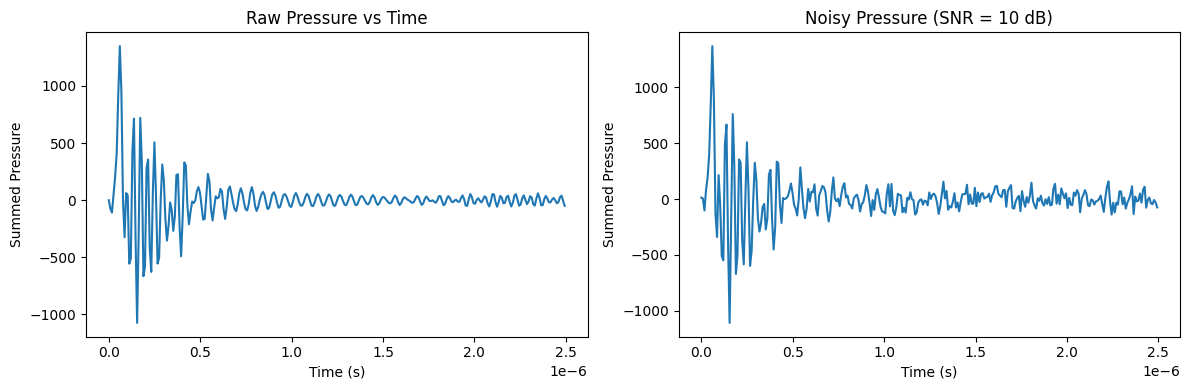

In [26]:
plot_presure_and_noise_presure_over_time(weighted_p, sim_params['kgrid'], snr_db=10)

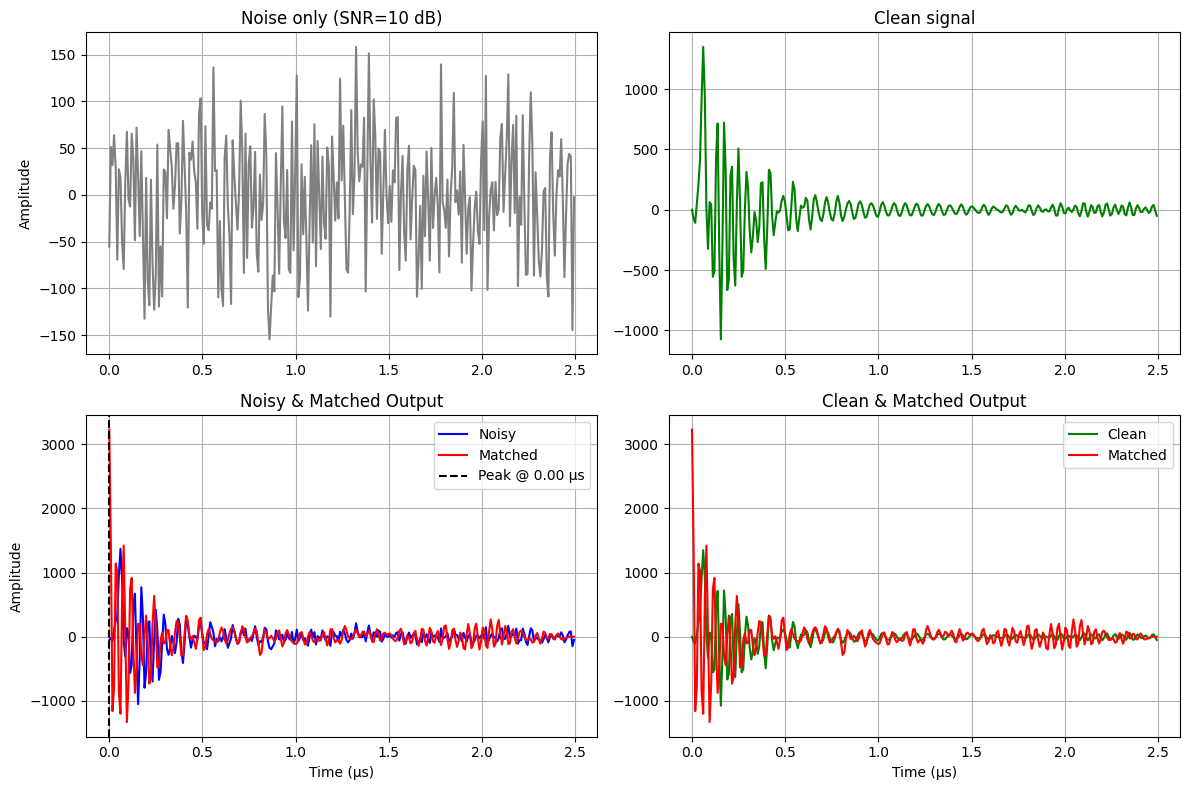

In [27]:
match_filter_results = apply_match_filter(weighted_p, sim_params['kgrid'], snr_db=10)
plot_match_filter_results(match_filter_results, sim_params['kgrid'].t_array.flatten(), snr_db=10)